# PBL Fase 6 - Sistema de Visão Computacional com YOLOv5
**Aluno:** Gustavo Andrade  
**RM:** 564102  
**Objetivo:** Demonstrar o funcionamento de um sistema de visão computacional usando YOLOv5 para dois objetos diferentes (canetas e garrafas), seguindo as metas do projeto FarmTech Solutions.

---

## 1️⃣ Instalação do YOLOv5 e dependências


In [ ]:
# --- Célula 1: Instalação do YOLOv5 e dependências ---
# Clonar repositório oficial do YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Instalar pacotes necessários
!pip install -r requirements.txt


In [ ]:
# --- Célula 2: Conectar Google Drive ---
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Organização do Dataset

- Objeto A: 40 imagens
  - Treino: 32 imagens
  - Validação: 4 imagens
  - Teste: 4 imagens
- Objeto B: 40 imagens
  - Treino: 32 imagens
  - Validação: 4 imagens
  - Teste: 4 imagens

  objeto A escolhido: canetas |
  Objeto B escolhido: garrafas

> Todas as imagens e labels devem estar organizadas no Google Drive do grupo, separadas em pastas `train`, `val` e `test`.  
> As labels devem ser feitas no Make Sense AI e salvas no Google Drive.


In [ ]:
# --- Célula 3: Criar arquivo dataset.yaml ---
# Esse arquivo indica onde estão os datasets e nomes das classes
dataset_yaml = """
train: /content/drive/MyDrive/YOLO/dataset/images/train
val: /content/drive/MyDrive/YOLO/dataset/images/val
test: /content/drive/MyDrive/YOLO/dataset/images/test

nc: 2
names: ['objA', 'objB']
"""

# Salvar dataset.yaml no Google Drive
with open('/content/drive/MyDrive/YOLO/dataset/dataset.yaml', 'w') as f:
    f.write(dataset_yaml)


In [ ]:
# --- Célula 4: Treinar YOLOv5 com 30 épocas ---
!python train.py --img 640 --batch 16 --epochs 30 \
--data /content/drive/MyDrive/YOLO/dataset/dataset.yaml \
--weights yolov5s.pt --project /content/drive/MyDrive/YOLO/runs/train --name exp30




In [ ]:
# --- Célula 5: Treinar YOLOv5 com 60 épocas ---
!python train.py --img 640 --batch 16 --epochs 60 \
--data /content/drive/MyDrive/YOLO/dataset/dataset.yaml \
--weights yolov5s.pt --project /content/drive/MyDrive/YOLO/runs/train --name exp60


In [ ]:
# --- Célula 6: validação dos modelos YOLO5
!python val.py --weights /content/drive/MyDrive/YOLO/runs/train/exp30/weights/best.pt \
--data /content/drive/MyDrive/YOLO/dataset/dataset.yaml --img 640
!python val.py --weights /content/drive/MyDrive/YOLO/runs/train/exp60/weights/best.pt \
--data /content/drive/MyDrive/YOLO/dataset/dataset.yaml --img 640



In [ ]:
# --- Célula 6: testes dos modelos YOLO5
!python detect.py --weights /content/drive/MyDrive/YOLO/runs/train/exp30/weights/best.pt \
--img 640 --source /content/drive/MyDrive/YOLO/dataset/images/test \
--project /content/drive/MyDrive/YOLO/runs/detect --name test30
!python detect.py --weights /content/drive/MyDrive/YOLO/runs/train/exp60/weights/best.pt \
--img 640 --source /content/drive/MyDrive/YOLO/dataset/images/test \
--project /content/drive/MyDrive/YOLO/runs/detect --name test60


# 🧠 Resultados do Treinamento YOLOv5

## ⚙️ Modelo 1 — 30 Épocas
**Caminho do modelo:**  
`/content/drive/MyDrive/YOLO/runs/train/exp303/`

**Resumo do desempenho:**

| Classe     | Precisão (P) | Recall (R) | mAP@50 | mAP@50-95 |
|-------------|--------------|------------|---------|------------|
| **caneta**  | 0.863        | 0.750      | 0.768   | 0.692      |
| **garrafa** | 0.418        | 0.209      | 0.472   | 0.375      |
| **Geral**   | 0.641        | 0.480      | 0.620   | 0.534      |

📉 **Conclusão:**  
O modelo com **30 épocas** apresentou resultados razoáveis, mas com **baixa taxa de recall e precisão** para a classe “garrafa”.  
Isso indica que o número de épocas foi insuficiente para o modelo aprender bem os padrões visuais dos objetos.

**Visualizações:**




📊 Resultados de: /content/drive/MyDrive/YOLO/runs/train/exp30/results.png


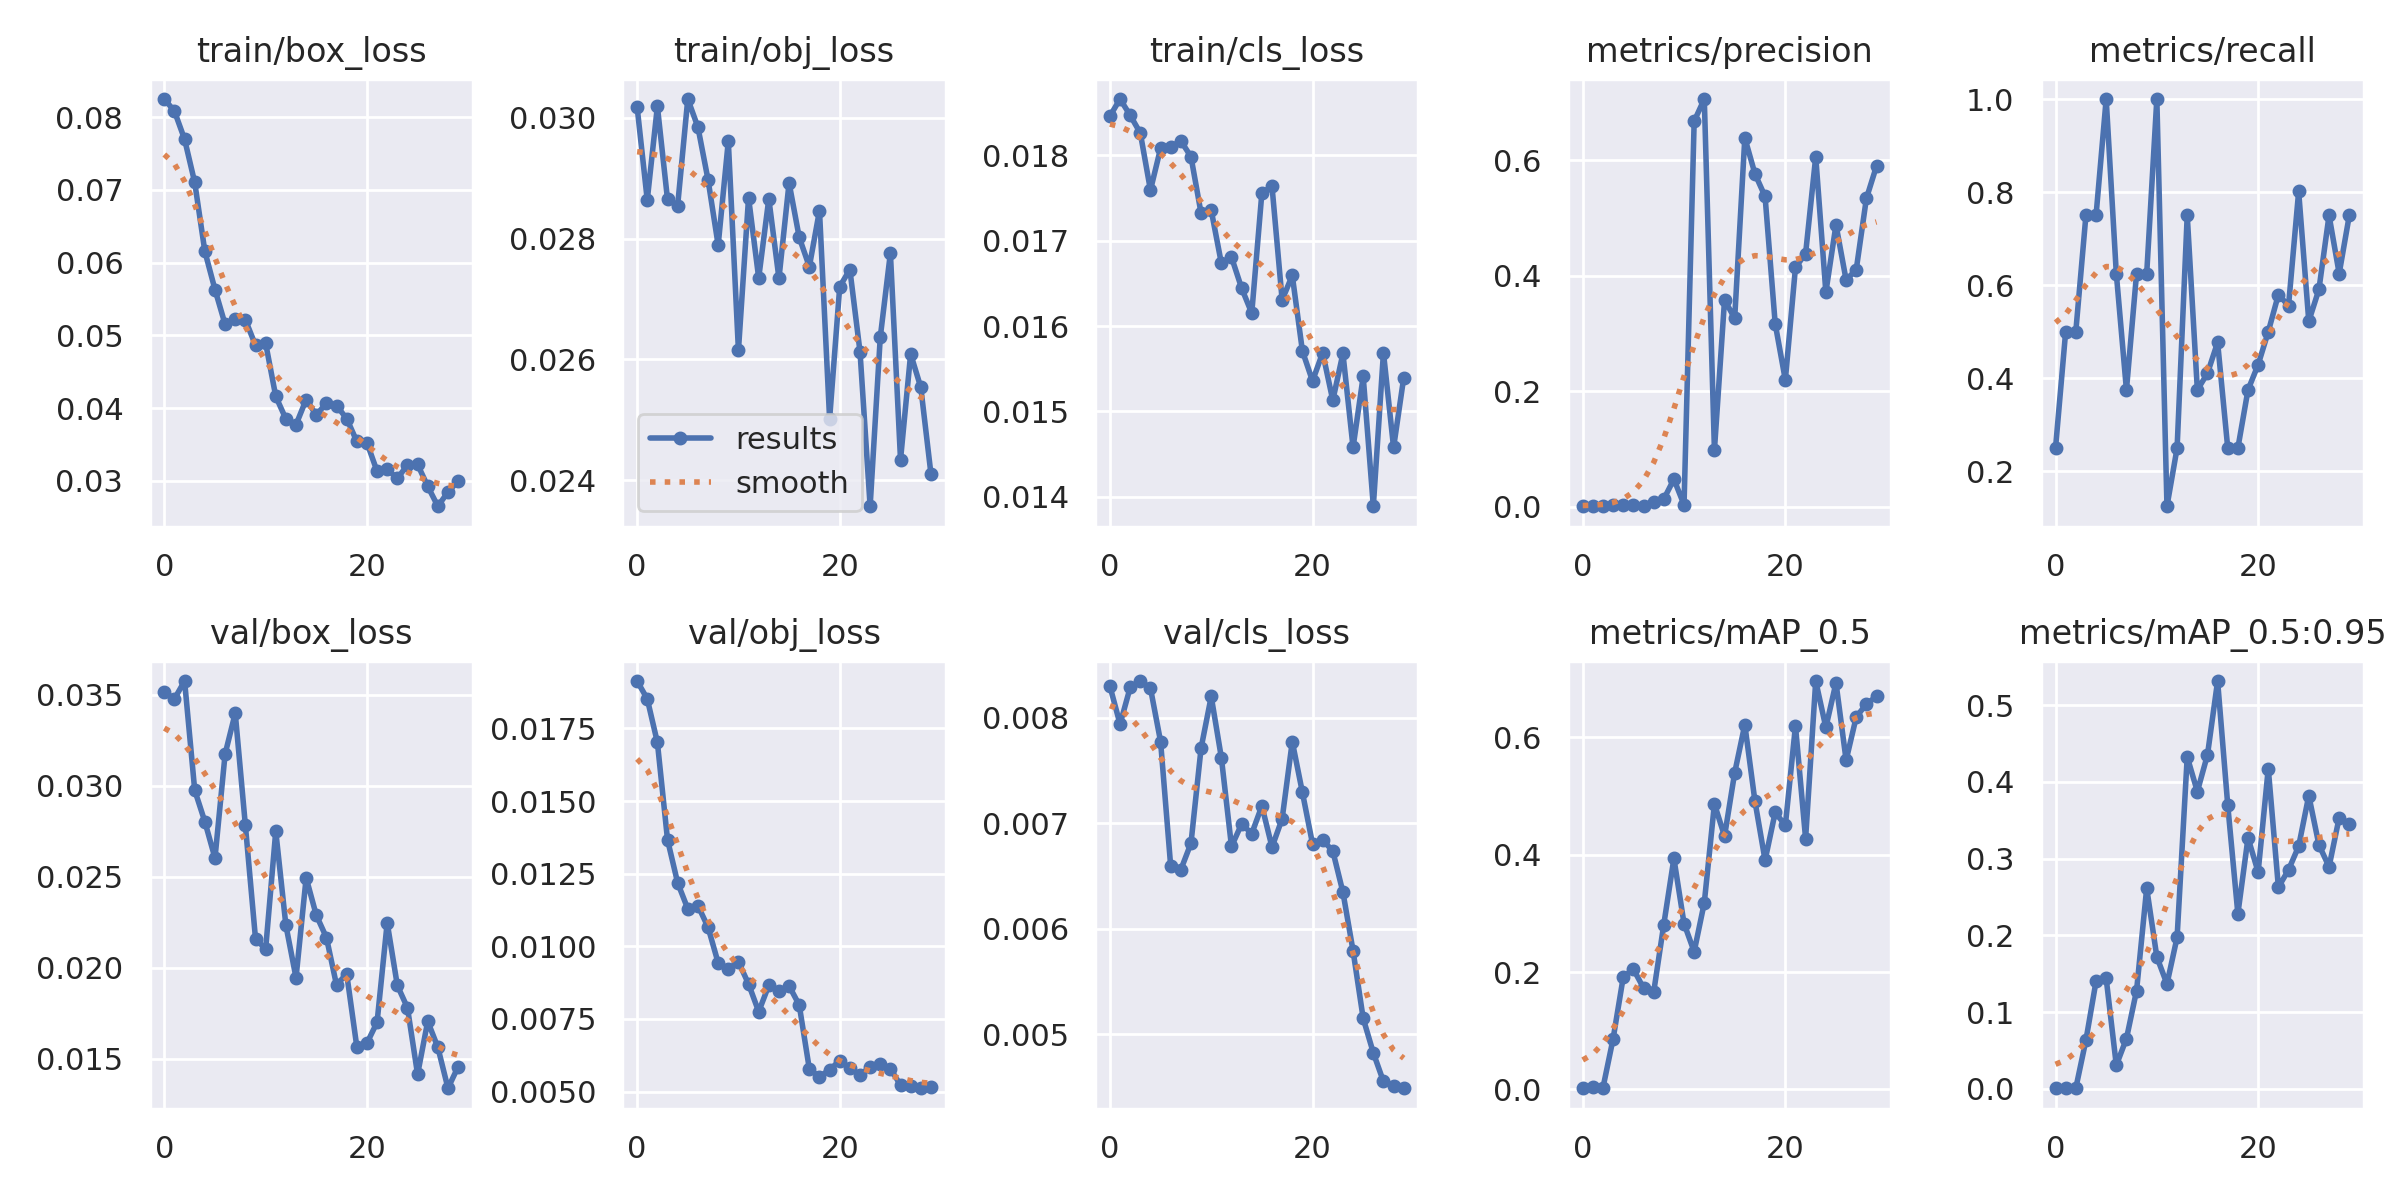


📊 Resultados de: /content/drive/MyDrive/YOLO/runs/train/exp60/results.png


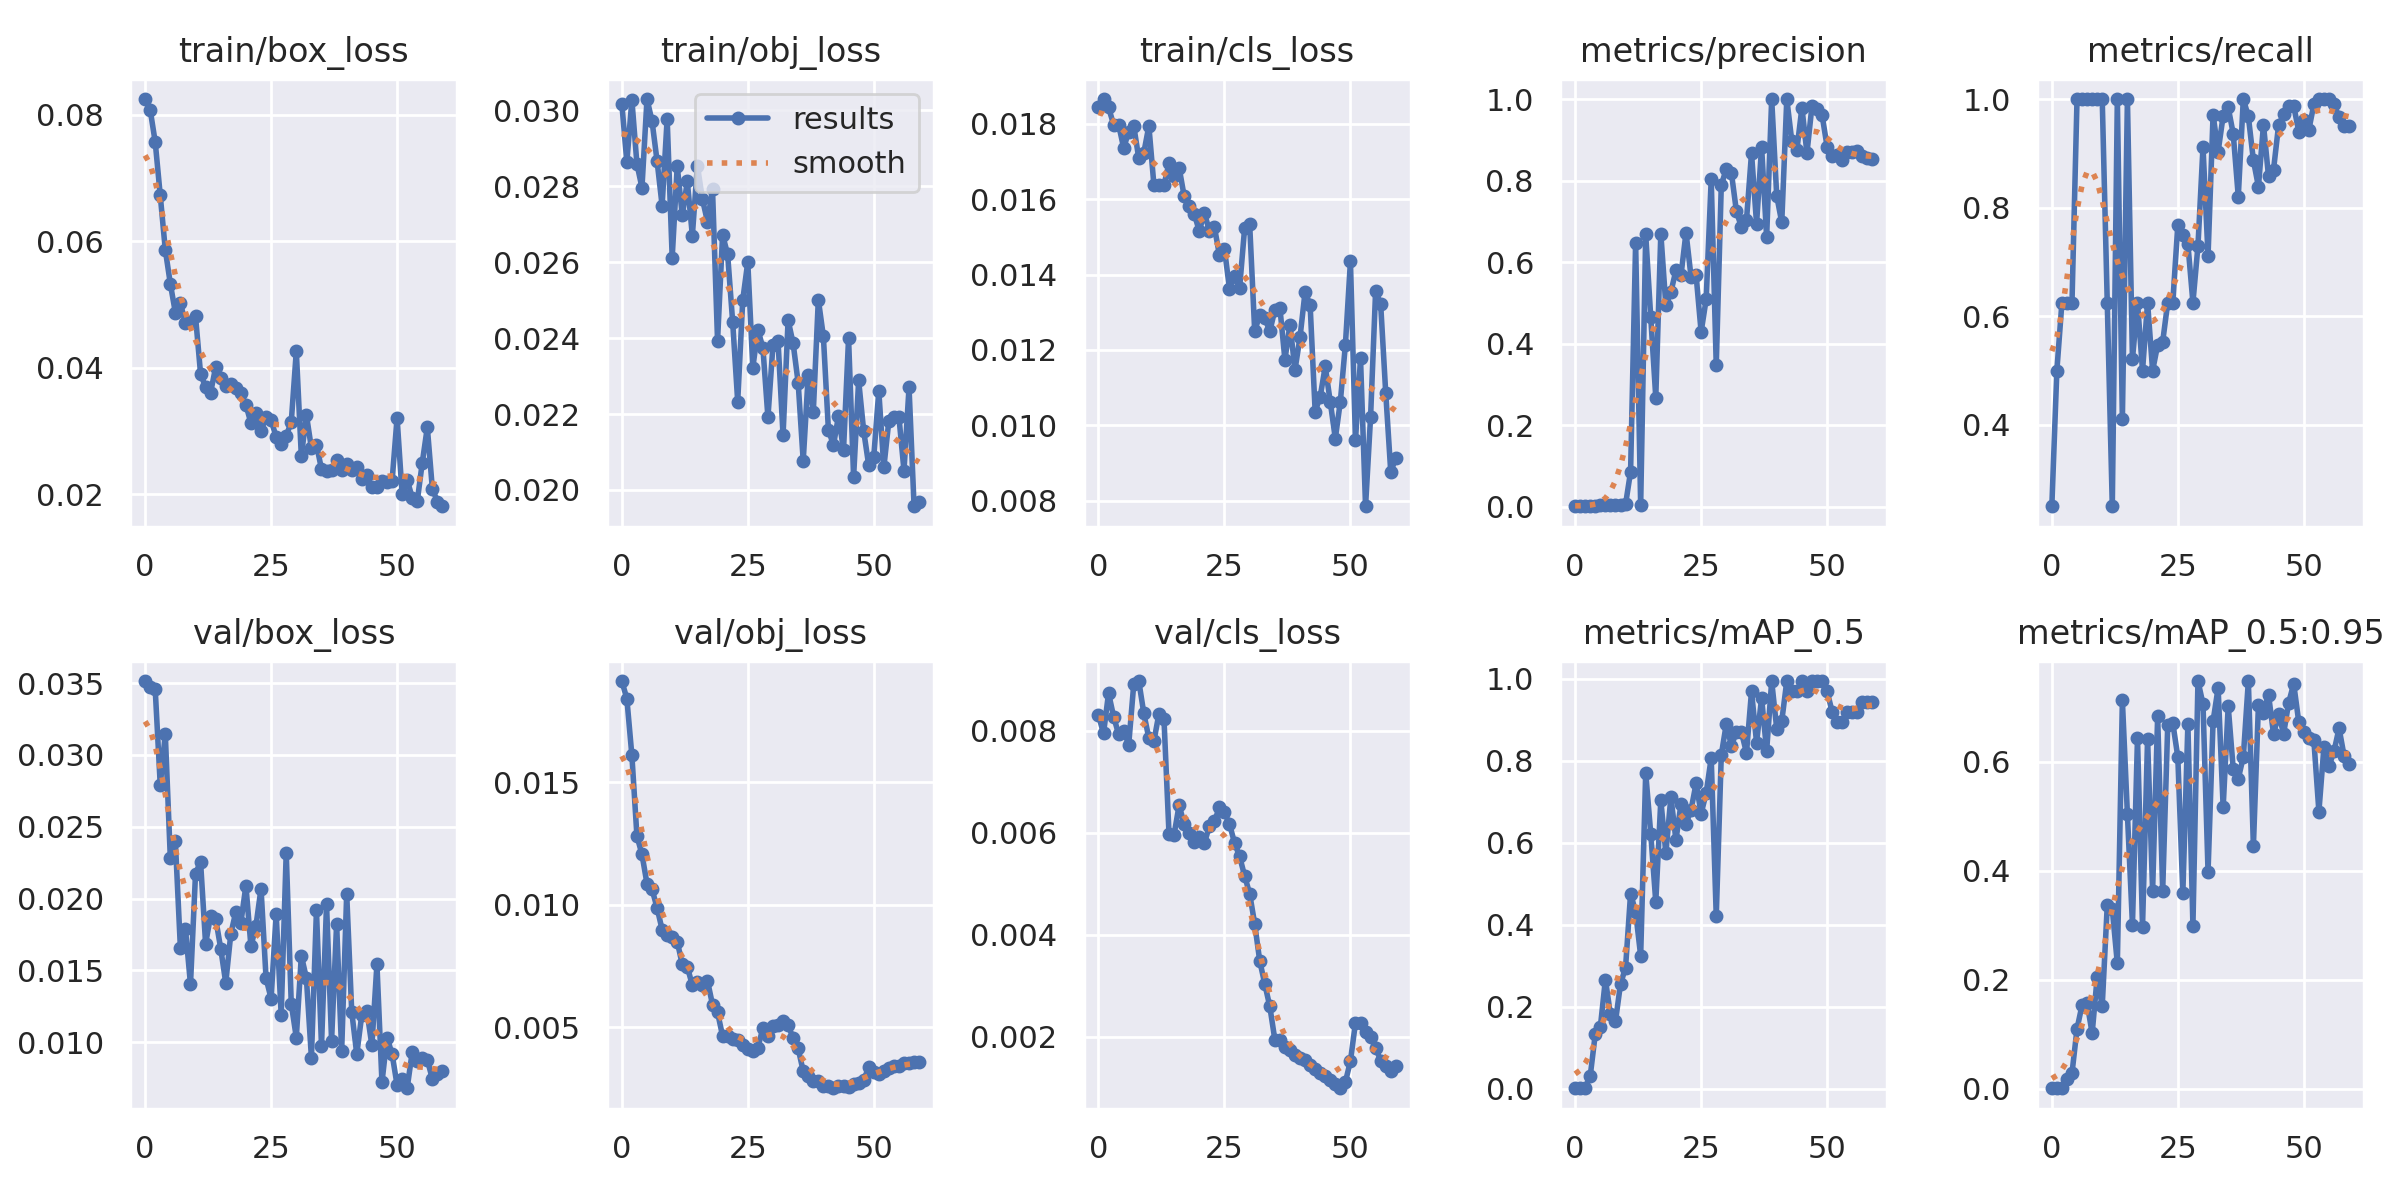


📊 Resultados de: /content/drive/MyDrive/YOLO/runs/train/exp303/results.png


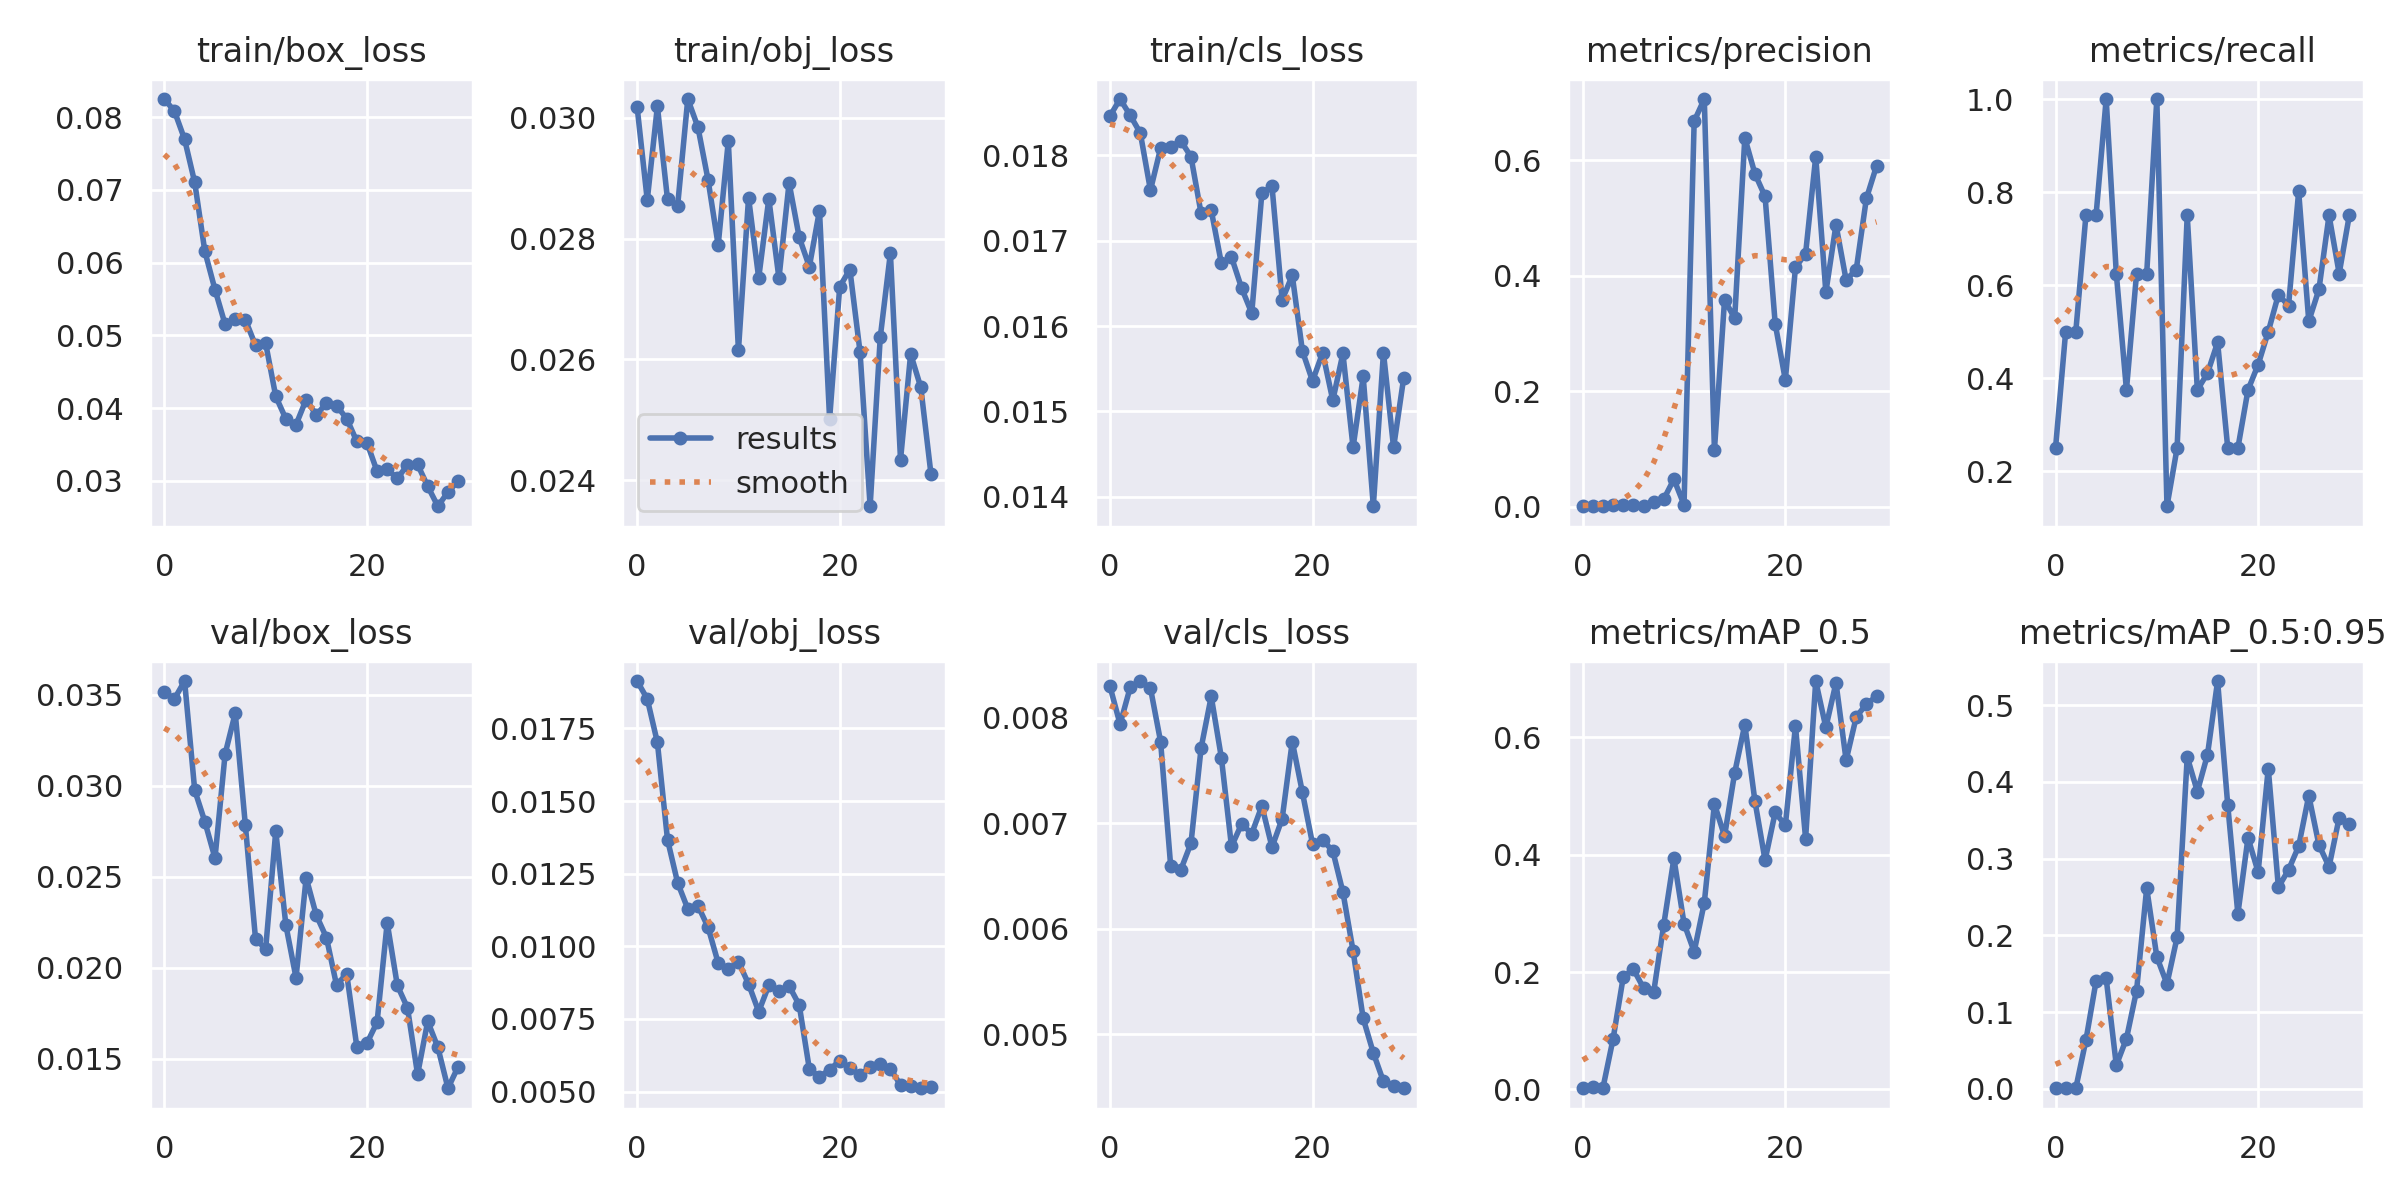


📊 Resultados de: /content/drive/MyDrive/YOLO/runs/train/exp602/results.png


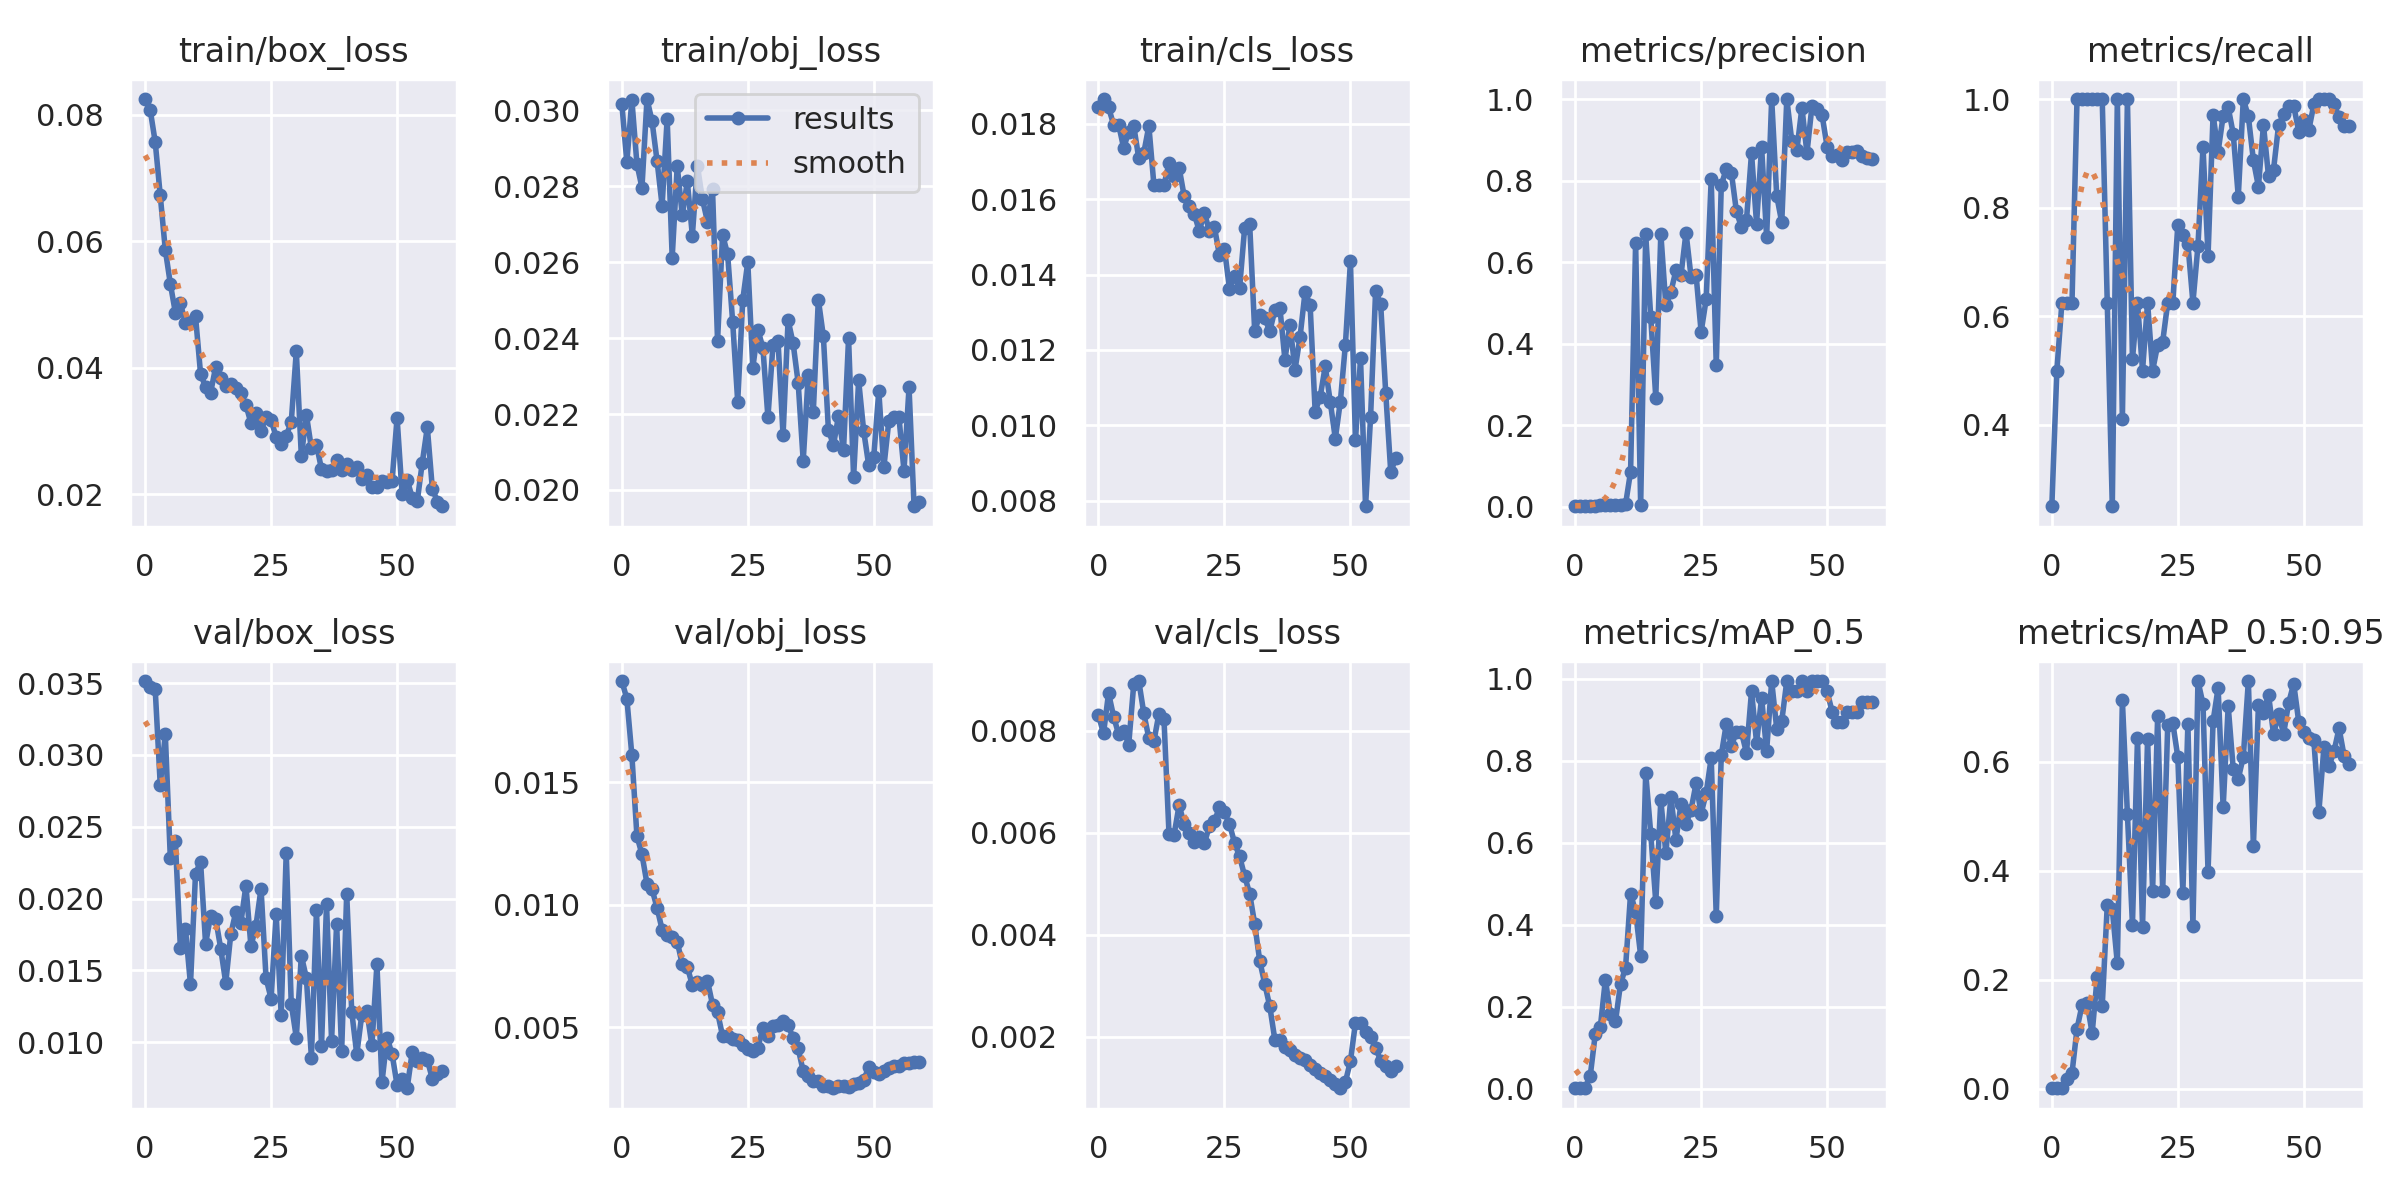

In [7]:
from IPython.display import Image, display

# Mostra os resultados dos 4 experimentos
paths = [
    "/content/drive/MyDrive/YOLO/runs/train/exp30/results.png",
    "/content/drive/MyDrive/YOLO/runs/train/exp60/results.png",
    "/content/drive/MyDrive/YOLO/runs/train/exp303/results.png",
    "/content/drive/MyDrive/YOLO/runs/train/exp602/results.png"
]

for p in paths:
    print(f"\n📊 Resultados de: {p}")
    display(Image(filename=p))

